## Estadística Aplicada

**Integrantes del equipo:**

- Javier Bazaldua Parga 
1960046

- Angie Paola Gonzalez Garza
1860483

- Marcela Espinoza Sanchez
1918509

- Maria Guadalupe Valerio Ramos
1886503

- Francisco Humberto Villegas Reyna
1731722

**Grupo:** 43

**Nombre del equipo:** Los amsiosos

In [1]:
## librerias básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# librerias especializadas
from lifelines import CoxPHFitter, KaplanMeierFitter, ExponentialFitter, WeibullFitter, LogNormalFitter
import seaborn as sns
from lifelines.statistics import logrank_test

# 1. Añadirás una primera parte a la notebook llamada introducción.
Hablaras del problema de supervivencia que te toco analizar: ¿qué mide? ¿cuál es el evento? ¿qué tiempo es el que se mide? 


# Introducción
**La base de datos proporcionada contiene información relevante sobre cada préstamo.
La variables de "crédito_pagado" si se ha pagado completamente el préstamo o no .Además, se dispone de información sobre el tiempo en meses que lleva pagar completamente el préstamo, registrado  en  la  variable  "meses",  y  el  monto  del  préstamo  otorgado  en  euros, registrado en la variable "cantidad", mediremos el promedio del tiempo que tarda en pagarlo en cuestión de meses y lo que puede dar por adelantado en cada mes.** 

In [3]:
# importacion de los datos
prestamos_df=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv')
prestamos_df

,saldo_cuenta,meses,historia_crediticia,uso,cantidad,saldo_cuenta_ahorro,años_trabajando,tasa_de_interes,genero_estado_civil,aval,...,activos,edad,planes_de_pago,casa,numero_creditos,situacion_laboral,dependientes_economicos,telefono,extranjero,credito_pagado
0,menor_a_cero,6,no_ha_pagado,TV,1169,NaN,mas_de_7,4,hombre_soltero,NaN,...,bienes_raices,67,NaN,propia,2,gobierno,1,1,1,1
1,cero_a_200,48,pago_algun_credito,TV,5951,menor_100,1_a_4,2,mujer_no_soltera,NaN,...,bienes_raices,22,NaN,propia,1,gobierno,1,0,1,0
2,sin_cuenta,12,no_ha_pagado,colegiaturas,2096,menor_100,4_a_7,2,hombre_soltero,NaN,...,bienes_raices,49,NaN,propia,1,obrero,2,0,1,1
3,menor_a_cero,42,pago_algun_credito,mobiliario,7882,menor_100,4_a_7,2,hombre_soltero,aval,...,seguro_vida,45,NaN,prestada,1,gobierno,2,0,1,1
4,menor_a_cero,24,pago_retrasado,coche_nuevo,4870,menor_100,1_a_4,3,hombre_soltero,NaN,...,sin_activos,53,NaN,prestada,2,gobierno,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,sin_cuenta,12,pago_algun_credito,mobiliario,1736,menor_100,4_a_7,3,mujer_no_soltera,NaN,...,bienes_raices,31,NaN,propia,1,obrero,1,0,1,1
996,menor_a_cero,30,pago_algun_credito,coche_usado,3857,menor_100,1_a_4,4,hombre_divorciado,NaN,...,seguro_vida,40,NaN,propia,1,administrativo,1,1,1,1
997,sin_cuenta,12,pago_algun_credito,TV,804,menor_100,mas_de_7,4,hombre_soltero,NaN,...,otro_tipo,38,NaN,propia,1,gobierno,1,0,1,1
998,menor_a_cero,45,pago_algun_credito,TV,1845,menor_100,1_a_4,4,hombre_soltero,NaN,...,sin_activos,23,NaN,prestada,1,gobierno,1,1,1,0


### 2.Comenta quien podría estar interesado en el análisis de supervivencia de tu base de datos
y por qué consideras importante realizar un modelo de supervivencia para tu base de datos (¿qué nos permite conocer o saber?)

El baco es el principal interesado, pues nuestro analisis  sirve para conocer el perfil de los clientes, el cumplimiento o incumplimiento de los pagos, para tomar en cuenta a quien se le autoriza o rechaza un préstamo.

Un análisis de supervivencia seria importante aplicarlo en este tipo de datos porque nos permite ver el manejo de datos censurados, pronósticos, validaciones y evaluación del modelo, todo esto para conocer de los diferentes clientes.

# 3.Comenta si tu base de datos posee censura
(en tu caso qué significa la censura para tu base de datos en particular).

**La base de datos proporcionada no tenemos censura ya que podemor observar los clientes que si pagaron a tiemmpo y los que no han terminado o no lo pagaron dado que contiene información relevante sobre cada préstamo.**

In [4]:
km = KaplanMeierFitter().fit(prestamos_df['meses'],prestamos_df['credito_pagado'])
mediana = km.median_survival_time_
print("Medidana del tiempo es:", mediana)

Medidana del tiempo es: 24.0


**la mediana es de 24 meses, lo cual significa que que las personas suelen liquidar sus deudas alrederor de los  2 años de haberlo solicitado, pero es menor al promedio de 19 meses al rededor de 1 año 8 meses.**

Los que pagan mas rápido son aquellos cuyos montos están por debajo de la mediana, mientras que los que están por encima de la mediana, se podría decir que son aquellos que no piensan pagar, que realmente es que demoran demasiado tiempo.

# 4.Conviertelas variables categóricas a dummies.

In [5]:
#Las variables object son variables categoricas que debemos hacer numericas
prestamos_df.dtypes

saldo_cuenta               object
meses                       int64
historia_crediticia        object
uso                        object
cantidad                    int64
saldo_cuenta_ahorro        object
años_trabajando            object
tasa_de_interes             int64
genero_estado_civil        object
aval                       object
años_actual_domicilio       int64
activos                    object
edad                        int64
planes_de_pago             object
casa                       object
numero_creditos             int64
situacion_laboral          object
dependientes_economicos     int64
telefono                    int64
extranjero                  int64
credito_pagado              int64
dtype: object

In [6]:
# Antes de hacer las variables dummies, verificaremos no tener missing values,en caso de haberlos debemos decidir imputar o eliminar
prestamos_df.isnull().sum()

saldo_cuenta                 0
meses                        0
historia_crediticia          0
uso                          0
cantidad                     0
saldo_cuenta_ahorro        183
años_trabajando              0
tasa_de_interes              0
genero_estado_civil          0
aval                       948
años_actual_domicilio        0
activos                      0
edad                         0
planes_de_pago             814
casa                         0
numero_creditos              0
situacion_laboral            0
dependientes_economicos      0
telefono                     0
extranjero                   0
credito_pagado               0
dtype: int64

In [7]:
# depuramos
prestamos_df= prestamos_df.drop(['saldo_cuenta_ahorro','aval','planes_de_pago'], axis=1)

In [8]:
# verificaremos que no tengamos valores repetidos
prestamos_df.duplicated().sum()

0

In [9]:
# Procedemos con hacer las variables categoricas restantes a dummies
dummies_saldo_cuenta = pd.get_dummies(prestamos_df['saldo_cuenta'], prefix='saldo_cuenta').astype(int)
dummies_historia_crediticia = pd.get_dummies(prestamos_df['historia_crediticia'], prefix='historia_crediticia').astype(int)
dummies_años_trabajando = pd.get_dummies(prestamos_df['años_trabajando'], prefix='años_trabajando').astype(int)
dummies_uso = pd.get_dummies(prestamos_df['uso'], prefix='uso').astype(int)
dummies_genero_estado_civil = pd.get_dummies(prestamos_df['genero_estado_civil'], prefix='genero_estado_civil').astype(int)
dummies_activos = pd.get_dummies(prestamos_df['activos'], prefix='activos').astype(int)
dummies_casa = pd.get_dummies(prestamos_df['casa'], prefix='casa').astype(int)
dummies_situacion_laboral = pd.get_dummies(prestamos_df['situacion_laboral'], prefix='situacion_laboral').astype(int)

# Eliminamos una de las dummies de cada variable para cumplir con el n-1 dummies
dummies_saldo_cuenta = dummies_saldo_cuenta.drop('saldo_cuenta_mas_de_200',axis=1)
dummies_historia_crediticia = dummies_historia_crediticia.drop('historia_crediticia_pago_todos',axis=1)
dummies_años_trabajando = dummies_años_trabajando.drop('años_trabajando_desempleado',axis=1)
dummies_uso = dummies_uso.drop('uso_reestructuración',axis=1)
dummies_genero_estado_civil = dummies_genero_estado_civil.drop('genero_estado_civil_hombre_divorciado',axis=1)
dummies_activos = dummies_activos.drop('activos_sin_activos',axis=1)
dummies_casa = dummies_casa.drop('casa_prestada',axis=1)
dummies_situacion_laboral = dummies_situacion_laboral.drop('situacion_laboral_desempleado',axis=1)

# Agregamos cada una de las dummies creadas  y borramos las que no son necesarias
prestamos_df = pd.concat([prestamos_df, dummies_saldo_cuenta,dummies_historia_crediticia,dummies_años_trabajando,dummies_uso,dummies_genero_estado_civil,dummies_activos,dummies_casa,dummies_situacion_laboral], axis=1)
prestamos_df = prestamos_df.drop(['saldo_cuenta', 'historia_crediticia', 'años_trabajando','uso','genero_estado_civil','activos','casa','situacion_laboral'], axis=1)
prestamos_df

,meses,cantidad,tasa_de_interes,años_actual_domicilio,edad,numero_creditos,dependientes_economicos,telefono,extranjero,credito_pagado,...,genero_estado_civil_hombre_soltero,genero_estado_civil_mujer_no_soltera,activos_bienes_raices,activos_otro_tipo,activos_seguro_vida,casa_propia,casa_renta,situacion_laboral_administrativo,situacion_laboral_gobierno,situacion_laboral_obrero
0,6,1169,4,4,67,2,1,1,1,1,...,1,0,1,0,0,1,0,0,1,0
1,48,5951,2,2,22,1,1,0,1,0,...,0,1,1,0,0,1,0,0,1,0
2,12,2096,2,3,49,1,2,0,1,1,...,1,0,1,0,0,1,0,0,0,1
3,42,7882,2,4,45,1,2,0,1,1,...,1,0,0,0,1,0,0,0,1,0
4,24,4870,3,4,53,2,2,0,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0,1,1,...,0,1,1,0,0,1,0,0,0,1
996,30,3857,4,4,40,1,1,1,1,1,...,0,0,0,0,1,1,0,1,0,0
997,12,804,4,4,38,1,1,0,1,1,...,1,0,0,1,0,1,0,0,1,0
998,45,1845,4,4,23,1,1,1,1,0,...,1,0,0,0,0,0,0,0,1,0


In [10]:
# revisamos que no tenemos variables categoricas
prestamos_df.dtypes

meses                                     int64
cantidad                                  int64
tasa_de_interes                           int64
años_actual_domicilio                     int64
edad                                      int64
numero_creditos                           int64
dependientes_economicos                   int64
telefono                                  int64
extranjero                                int64
credito_pagado                            int64
saldo_cuenta_cero_a_200                   int32
saldo_cuenta_menor_a_cero                 int32
saldo_cuenta_sin_cuenta                   int32
historia_crediticia_no_ha_pagado          int32
historia_crediticia_pago_algun_credito    int32
historia_crediticia_pago_retrasado        int32
historia_crediticia_sin_creditos          int32
años_trabajando_1_a_4                     int32
años_trabajando_4_a_7                     int32
años_trabajando_mas_de_7                  int32
años_trabajando_menor_a_1               

# 5.Cerciórate de  no  tener  missing  values o  valores  repetidos
en  caso  de tenerlos corrige la base de datos

In [11]:
#  missing values
prestamos_df.isnull().sum()

meses                                     0
cantidad                                  0
tasa_de_interes                           0
años_actual_domicilio                     0
edad                                      0
numero_creditos                           0
dependientes_economicos                   0
telefono                                  0
extranjero                                0
credito_pagado                            0
saldo_cuenta_cero_a_200                   0
saldo_cuenta_menor_a_cero                 0
saldo_cuenta_sin_cuenta                   0
historia_crediticia_no_ha_pagado          0
historia_crediticia_pago_algun_credito    0
historia_crediticia_pago_retrasado        0
historia_crediticia_sin_creditos          0
años_trabajando_1_a_4                     0
años_trabajando_4_a_7                     0
años_trabajando_mas_de_7                  0
años_trabajando_menor_a_1                 0
uso_TV                                    0
uso_coche_nuevo                 

In [12]:
# valores repetidos
prestamos_df.duplicated().sum()

0

# 6.Calcula las estadísticas descriptivas de las variables. 

In [13]:
prestamos_df.describe()

,meses,cantidad,tasa_de_interes,años_actual_domicilio,edad,numero_creditos,dependientes_economicos,telefono,extranjero,credito_pagado,...,genero_estado_civil_hombre_soltero,genero_estado_civil_mujer_no_soltera,activos_bienes_raices,activos_otro_tipo,activos_seguro_vida,casa_propia,casa_renta,situacion_laboral_administrativo,situacion_laboral_gobierno,situacion_laboral_obrero
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.404000,0.963000,0.700000,...,0.54800,0.310000,0.282000,0.332000,0.23200,0.713000,0.179000,0.148000,0.630000,0.2000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.490943,0.188856,0.458487,...,0.49794,0.462725,0.450198,0.471167,0.42232,0.452588,0.383544,0.355278,0.483046,0.4002
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.00000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,1.000000,0.0000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,0.00000,1.000000,0.000000,0.000000,1.000000,0.0000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.0000


# 7.Calcula lo siguiente
a)Cuantas variables y cuantas observaciones tienen la base

b)Cuál es el monto promedio de los créditos otorgados por el banco

c)Cuál es el tiempo promedio que se tardaron en pagar el préstamo los que pagaron el préstamo en su totalidad

d)Cuál es la tasa de interés promedio otorgada por el banco

e)Cuál es el monto promedio y la tasa de interés promedio de los que ya pagaron

f)Cuál es el monto promedio y la tasa de interés promedio de los que no han pagado 

In [14]:
#Variables
var = len(prestamos_df.columns)
print("Variables:", var)
#Observaciones
obs = len(prestamos_df)
print("Observaciones:", obs)
# monto promedio de los créditos otorgados por el banco
monto_prom = prestamos_df['cantidad'].mean()
print("Monto promedio de los créditos otorgados por el banco es de :", monto_prom)
# promedio  que  se  tardaron  en  pagar  el  préstamo.
tiempo_prom = prestamos_df[prestamos_df['credito_pagado']==1]['meses'].mean()
print("Tiempo promedio en pagar es de :", tiempo_prom)
# tasa de interés promedio otorgada por el banco
tasa_prom = prestamos_df['tasa_de_interes'].mean()
print("Tasa promedio otorgada por el banco es de:", tasa_prom)
# monto promedio y la tasa de interés promedio de los que ya pagaron
mont_pag = prestamos_df[prestamos_df['credito_pagado']==1]['cantidad'].mean()
print("Monto promedio de los que ya  pagaron es de :", mont_pag)

interés_pag =  prestamos_df[prestamos_df['credito_pagado']==1]['tasa_de_interes'].mean()
print("Tasa de interes promedio de los que ya pagaron es de :", interés_pag)
# monto promedio y la tasa de interés promedio de los que no han pagado
monto_nopag= prestamos_df[prestamos_df['credito_pagado'] == 0]['cantidad'].mean() 
print("Monto promedio de los que no han pagado es de :", monto_nopag)

interés_nopag = prestamos_df[prestamos_df['credito_pagado'] == 0]['tasa_de_interes'].mean()  
print("Tasa de interés promedio de los que no han pagado es de :", interés_nopag)

Variables: 40
Observaciones: 1000
Monto promedio de los créditos otorgados por el banco es de : 3271.258
Tiempo promedio en pagar es de : 19.207142857142856
Tasa promedio otorgada por el banco es de: 2.973
Monto promedio de los que ya  pagaron es de : 2985.457142857143
Tasa de interes promedio de los que ya pagaron es de : 2.92
Monto promedio de los que no han pagado es de : 3938.1266666666666
Tasa de interés promedio de los que no han pagado es de : 3.0966666666666667


# 8.Calcula el tiempo promedio de supervivencia de la base de datos

In [15]:
print('el tiempo promedio de supervivencia de la base de datos es:',prestamos_df['meses'].mean(),'meses')

el tiempo promedio de supervivencia de la base de datos es: 20.903 meses


# 9.Calcula la función de supervivencia y grafícala utilizando Kaplan-Meier
obtén la mediana ¿qué significa la mediana?

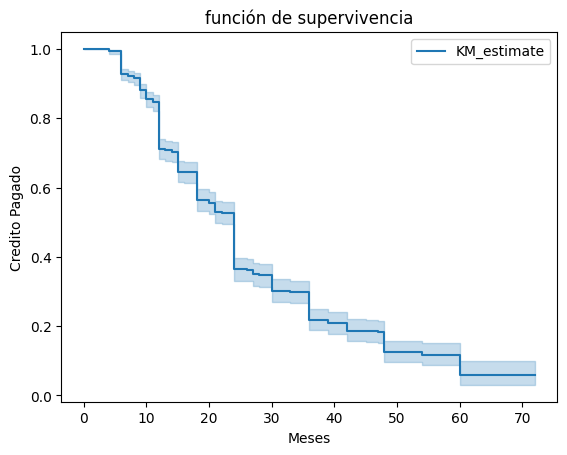

In [16]:
km = KaplanMeierFitter().fit(prestamos_df['meses'],prestamos_df['credito_pagado'])
km.plot_survival_function()
plt.title('función de supervivencia')
plt.xlabel('Meses')
plt.ylabel('Credito Pagado')
plt.show()

**la mediana se refiere al tiempo en el que el 50% de los eventos ha ocurrido,entonces significa que el punto de supervivencia llego a su tiempo al alcanzar 0.5**.

# 10.Elige construye una variable
por ejemplo,para la del crédito bancario, si debe másde 500 mil1, y 0 si debe menos, estima y grafica la función de supervivenciapor Kaplan-meierpara cada grupo

In [17]:
import statistics


In [18]:
median = prestamos_df['cantidad'].median()

prestamos_df['situación_mediana'] = np.where(prestamos_df['cantidad'] >= median, 1, 0)
prestamos_df

,meses,cantidad,tasa_de_interes,años_actual_domicilio,edad,numero_creditos,dependientes_economicos,telefono,extranjero,credito_pagado,...,genero_estado_civil_mujer_no_soltera,activos_bienes_raices,activos_otro_tipo,activos_seguro_vida,casa_propia,casa_renta,situacion_laboral_administrativo,situacion_laboral_gobierno,situacion_laboral_obrero,situación_mediana
0,6,1169,4,4,67,2,1,1,1,1,...,0,1,0,0,1,0,0,1,0,0
1,48,5951,2,2,22,1,1,0,1,0,...,1,1,0,0,1,0,0,1,0,1
2,12,2096,2,3,49,1,2,0,1,1,...,0,1,0,0,1,0,0,0,1,0
3,42,7882,2,4,45,1,2,0,1,1,...,0,0,0,1,0,0,0,1,0,1
4,24,4870,3,4,53,2,2,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0,1,1,...,1,1,0,0,1,0,0,0,1,0
996,30,3857,4,4,40,1,1,1,1,1,...,0,0,0,1,1,0,1,0,0,1
997,12,804,4,4,38,1,1,0,1,1,...,0,0,1,0,1,0,0,1,0,0
998,45,1845,4,4,23,1,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
mediana = statistics.median(prestamos_df['cantidad'])
print("La mediana de cantidad de dinero prestado es de", median)

La mediana de cantidad de dinero prestado es de 2319.5


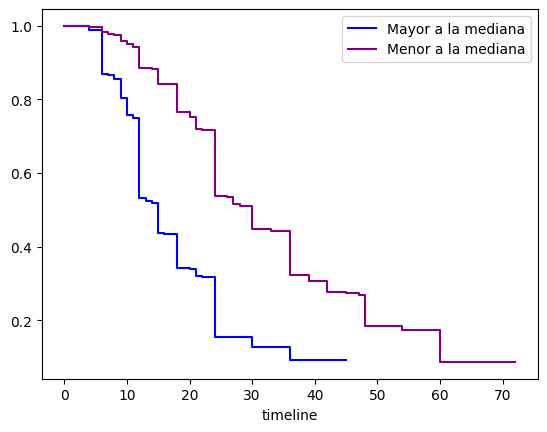

In [20]:
bm = prestamos_df.query('situación_mediana==0')
km_bm = KaplanMeierFitter().fit(bm['meses'], bm['credito_pagado'])

sm = prestamos_df.query('situación_mediana==1')
km_sm = KaplanMeierFitter().fit(sm['meses'], sm['credito_pagado'])

km_bm.plot_survival_function(ci_show = False, label = 'Mayor a la mediana',color='blue')
km_sm.plot_survival_function(ci_show = False, label = 'Menor a la mediana',color='purple')
plt.show()

# 11.Prueba Si las funciones de supervivencia son distintas usando el log rank test y comenta el resultado

In [21]:
lrt = logrank_test(bm['meses'], sm['meses'],
                   bm['credito_pagado'], sm['credito_pagado'])
lrt.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         199.26 <0.005    147.89

**Rechazamos H0 ya que el p-valor de el log-rank test es menor a 0.05, por lo que las funciones son distintas entre si. Aquellos que están en montos sobre la media, tendrán a demorar en pagar (y quizá  no llegar a pagar).**

## 12.Ahora estima un modelo de Cox
a) A parte de “tasa de interes” y “cantidad”, elige otras cuatro variables que creas que afectan el riesgo del evento

b) Di si cada una de las 6 variables que elegiste, aumentan/disminuyen el riesgo del evento y por qué

c) Realiza las transformaciones adecuadas para utilizar las variables en un modelo de cox

d) Estima un modelo de cox con las variables elegidas e interpreta los coeficientes.

# 12 a,b
**edad**:Aumenta;Entre mayor sea una persona, tiene mayor capacidad de pago, así como experiencia con préstamos/bancos, a diferencia de una persona joven e inexperta.

**dependientes_economicos:** Aumenta; depende de que si hay tener ayuda en lo economico puede pagar o no depende de que si hay tener ayuda en lo economico puede pagar o no.

**numero_creditos:** Aumenta; Suponiendo que la cantidad de créditos solicitados afecta el cumpliento de pago de estos.

**extranjero:** Aumenta; Si una persona trabaja en el extranjero, el tipo de cambio puede generar dificultades para hacer frente a los pagos del préstamo.

In [22]:
## c) Realiza las transformaciones adecuadas para utilizar las variables en un modelo de cox

columns_to_drop = ['saldo_cuenta_cero_a_200', 'saldo_cuenta_sin_cuenta', 'saldo_cuenta_menor_a_cero', 'años_actual_domicilio', 'telefono', 'genero_estado_civil_mujer_no_soltera', 'activos_bienes_raices', 'activos_otro_tipo', 'activos_seguro_vida', 'casa_propia', 'casa_renta', 'situacion_laboral_administrativo', 'situacion_laboral_gobierno', 'situacion_laboral_obrero']
prestamos_df = prestamos_df.drop(columns=columns_to_drop)

In [23]:
prestamos_df.isnull().sum()

meses                                     0
cantidad                                  0
tasa_de_interes                           0
edad                                      0
numero_creditos                           0
dependientes_economicos                   0
extranjero                                0
credito_pagado                            0
historia_crediticia_no_ha_pagado          0
historia_crediticia_pago_algun_credito    0
historia_crediticia_pago_retrasado        0
historia_crediticia_sin_creditos          0
años_trabajando_1_a_4                     0
años_trabajando_4_a_7                     0
años_trabajando_mas_de_7                  0
años_trabajando_menor_a_1                 0
uso_TV                                    0
uso_coche_nuevo                           0
uso_coche_usado                           0
uso_colegiaturas                          0
uso_mobiliario                            0
uso_otros                                 0
uso_poner_negocio               

In [24]:
## edad
edad = prestamos_df[['meses', 'edad', 'credito_pagado']]
cox_edad = CoxPHFitter().fit(edad, 'meses', 'credito_pagado')
cox_edad.print_summary()
print('Disminuye la capacidad de pago conforme a su edad.\nY la interpretación de los coeficientes es:.\np_valor=0.01, por lo tanto Rechazamos H0.Dado que la variable es significativa, \npodemos concluir con un 95% de confianza que la edad SI influye en la capacidad de pago de un préstamo. ')

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'meses'
                event col = 'credito_pagado'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -4266.36
         time fit was run = 2023-11-16 02:05:21 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
edad        0.01       1.01       0.00             0.00             0.01                 1.00                 1.01

            cmp to    z    p   -log2(p)
covariate                              
edad          0.00 2.49 0.01       6.31
---
Concordance = 0.54
Partial AIC = 8534.72
log-likelihood ratio test = 6.05 on 1 df
-log2(p) of ll-ratio test = 6.17

Disminuye la capacidad de pago conforme a su edad.
Y la interpretación de los coeficientes es:.
p_valor=0.01, por lo tanto Rechazamos H0.Dado que la variable es significativa, 
podemos concluir con un 95% de confianza que la edad SI influye en la capacidad de pago de un préstamo. 


In [25]:
## edad
dependientes_economicos = prestamos_df[['meses', 'dependientes_economicos', 'credito_pagado']]
cox_edad = CoxPHFitter().fit(dependientes_economicos , 'meses', 'credito_pagado')
cox_edad.print_summary()
print('Disminuye la capacidad de pago conforme a si tienen dependientes economicos .\nY la interpretación de los coeficientes es:.\np_valor=0.65, por lo tanto  No Rechazamos H0.Dado que la variable es no significativa, \npodemos concluir con un 95% de confianza que si tiene dependientes economicos No influye en la capacidad de pago del préstamo. ')

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'meses'
                event col = 'credito_pagado'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -4269.28
         time fit was run = 2023-11-16 02:05:21 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                       
dependientes_economicos   0.05       1.05       0.10            -0.16             0.25                 0.85                 1.29

                          cmp to    z    p   -log2(p)
covariate                                            
dependientes_economicos     0.00 0.45 0.65       0.61
---
Concordance = 0.51
Partial AIC = 8540.57
log-likelihood ratio test = 0.20 on 1 df
-log2(p) of ll-ratio test = 0.61

Disminuye la capacidad de pago conforme a si tienen dependientes economicos .
Y la interpretación de los coeficientes es:.
p_valor=0.65, por lo tanto  No Rechazamos H0.Dado que la variable es no significativa, 
podemos concluir con un 95% de confianza que si tiene dependientes economicos No influye en la capacidad de pago del préstamo. 


In [26]:
## numero de creditos
numero_creditos = prestamos_df[['meses', 'numero_creditos', 'credito_pagado']]

cox_telefono = CoxPHFitter().fit(numero_creditos, 'meses', 'credito_pagado')
cox_telefono.print_summary()
print('Disminuye la capacidad de pago conforme a el numero de creditos que tiene el cliente .\nY la interpretación de los coeficientes es:.\np_valor=0.29, por lo tanto No Rechazamos H0.Dado que la variable no es significativa, \npodemos concluir con un 95% de confianza que la cantidad de creditos solicitados NO influye en la capacidad de pago \nde estos prestamos.')


<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'meses'
                event col = 'credito_pagado'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -4268.82
         time fit was run = 2023-11-16 02:05:22 UTC

---
                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                               
numero_creditos   0.07       1.07       0.07            -0.06             0.20                 0.94                 1.22

                  cmp to    z    p   -log2(p)
covariate                                    
numero_creditos     0.00 1.07 0.29       1.81
---
Concordance = 0.50
Partial AIC = 8539.65
log-likelihood ratio test = 1.12 on 1 df
-log2(p) of ll-ratio test = 1.79

Disminuye la capacidad de pago conforme a el numero de creditos que tiene el cliente .
Y la interpretación de los coeficientes es:.
p_valor=0.29, por lo tanto No Rechazamos H0.Dado que la variable no es significativa, 
podemos concluir con un 95% de confianza que la cantidad de creditos solicitados NO influye en la capacidad de pago 
de estos prestamos.


In [27]:
## extranjero
extranjero = prestamos_df[['meses', 'extranjero', 'credito_pagado']]

cox_telefono = CoxPHFitter().fit(extranjero, 'meses', 'credito_pagado')
cox_telefono.print_summary()
print('Disminuye la capacidad de pago conforme a si el cliente es extranjero .\nY la interpretación de los coeficientes es:.\np_valor=<0.005, por lo tanto Rechazamos H0.Dado que la variable  es significativa, \npodemos concluir con un 95% de confianza que trabajar en el extranjero SI influye en la capacidad de pago de un préstamo.')

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'meses'
                event col = 'credito_pagado'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -4253.74
         time fit was run = 2023-11-16 02:05:22 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
extranjero  -1.18       0.31       0.18            -1.54            -0.83                 0.22                 0.44

             cmp to     z      p   -log2(p)
covariate                                  
extranjero     0.00 -6.58 <0.005      34.32
---
Concordance = 0.53
Partial AIC = 8509.48
log-likelihood ratio test = 31.29 on 1 df
-log2(p) of ll-ratio test = 25.42

Disminuye la capacidad de pago conforme a si el cliente es extranjero .
Y la interpretación de los coeficientes es:.
p_valor=<0.005, por lo tanto Rechazamos H0.Dado que la variable  es significativa, 
podemos concluir con un 95% de confianza que trabajar en el extranjero SI influye en la capacidad de pago de un préstamo.


# 13.Interpreta cada uno de los coeficientes obtenidos.
Utiliza cph.plot()para ayudarte con la interpretación.

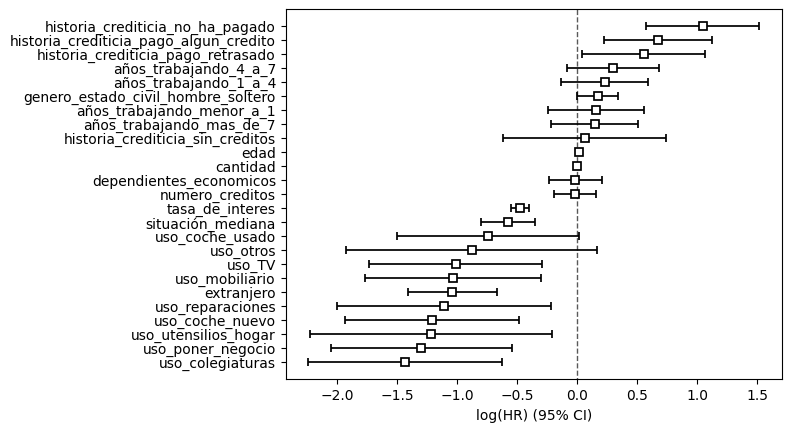

In [28]:
cph1 = CoxPHFitter()
cph1.fit(prestamos_df,'meses','credito_pagado')
cph1.params_
cph1.plot();

# 14.Con  base  en  los  cálculos  realizados, 
redacta  un  comentario integral de  por  lo menos  250 palabras que  resuma  el  análisis,  reflexiones  y  recomendaciones sobre la política de otorgamiento de créditos en el Banco de la Ilusión.


Entre mayor sea una persona, tiene mayor capacidad de pago, así como experiencia con préstamos/bancos, a diferencia de una persona joven e inexperta, Al solicitar un préstamo, la información personal del cliente es vital. Ayuda a mantener contacto y llegar a un acuerdo cuando se requiera ajustar el periodo o el monto de este, Suponiendo que la cantidad de créditos solicitados afecta el cumplimiento de pago de estos, Suponiendo que, si una persona tiene más personas a las que proveer, si incapacidad de pago aumentará. Por otro lado, podría decirse que una persona proveedora, tiene mayor y mejor vida financiera, Si una persona trabaja en el extranjero, el tipo de cambio puede generar dificultades para hacer frente a los pagos del préstamo, Entre mayor sea el monto del préstamo solicitado, mayores serán las dificultades de hacer frente a los pagos.


Recomendaría aplicar más y mejores filtros a los clientes, contar con una base de datos completa con información personal, y un eficiente historial que determine el riesgo que puede traer un buen cliente para las mejoras del Banco de la ilusión. 
En los préstamos, el riesgo no solo recae en quien toma prestado el dinero, sino también para quien lo presta. Sería importante contar la información de estas personas, así como su experiencia con clientes. Si sus clientes demoran en pagar o no lo hacen, puede ser que el foco rojo venga desde la raíz de quien está otorgando el préstamo, y puede prevenirse a tiempo y no afectar a la empresa y al cliente.

# 15.investiga  y  señala  las  limitaciones  de  Kaplan-Meier  y  del modelo de Cox 

# El método  Kaplan-Meier tiene las siguientes limitaciones:

1.Censura no informativa:

Limitación:El método de Kaplan-Meier asume que la censura es no informativa, lo que significa que la probabilidad de censura en cualquier punto es independiente de cuándo ocurrió el evento.

Impacto:Si la censura no es no informativa, es decir, si hay patrones sistemáticos en la censura, los resultados del estimador pueden ser sesgados.

2.Independencia de eventos:

Limitación: El método de Kaplan-Meier asume que los eventos son independientes. En situaciones donde los eventos no son independientes, como en estudios longitudinales, esta suposición puede no cumplirse.

Impacto: Si hay dependencia entre eventos, las estimaciones de la función de supervivencia pueden ser inexactas.

3.Homogeneidad de riesgos proporcionales:

Limitación: El método no asume proporcionalidad de riesgos, lo que significa que la razón de riesgos entre dos grupos no cambia con el tiempo.

Impacto: Si la proporcionalidad de riesgos no se cumple, el análisis de regresión de Cox (que a menudo se utiliza junto con Kaplan-Meier) podría no ser apropiado.

4.Manejo de datos censurados:

Limitación:El método presupone que las observaciones censuradas son independientes y provienen de la misma población que las observaciones no censuradas.

Impacto:Si estas suposiciones no se cumplen, las estimaciones pueden ser sesgadas.

5.No es adecuado para comparaciones múltiples:

Limitación: El método es más adecuado para comparar dos grupos. Al intentar comparar múltiples grupos, aumenta la probabilidad de obtener resultados estadísticamente significativos simplemente por azar.

Impacto: Se pueden necesitar métodos más avanzados o ajustes para manejar comparaciones múltiples.

A pesar de estas limitaciones, el estimador de Kaplan-Meier sigue siendo una herramienta valiosa para analizar datos de supervivencia y es ampliamente utilizado en estudios médicos y otras disciplinas. Es importante entender estas limitaciones y, en casos donde no se cumplan sus suposiciones, considerar métodos más avanzados o realizar análisis adicionales.


# El modelo de regresión de Cox, que se utiliza en análisis de supervivencia,tiene sus limitaciones.

1.Proporcionalidad de riesgos:

Limitación: El modelo de Cox asume proporcionalidad de riesgos, lo que significa que la relación entre las variables predictoras y el riesgo de eventos es constante a lo largo del tiempo.

Impacto:Si esta suposición no se cumple, los resultados del modelo pueden ser sesgados.

2.Censura no informativa:

Limitación:Igual que con el estimador de Kaplan-Meier, el modelo de Cox asume que la censura es no informativa.

Impacto:Si la censura no es no informativa, los resultados pueden ser sesgados.

3.Linealidad en logaritmo del riesgo:

Limitación: El modelo de Cox asume que la relación entre las covariables y el logaritmo del riesgo es lineal.

Impacto: Si esta relación no es lineal, puede haber sesgo en las estimaciones.

4.Independencia de eventos:

Limitación: Al igual que con el estimador de Kaplan-Meier, el modelo de Cox asume independencia entre eventos.

Impacto: Si hay dependencia entre eventos, las estimaciones pueden ser sesgadas.

5.Manejo de datos censurados:

Limitación: Se presupone que las observaciones censuradas son independientes y provienen de la misma población que las observaciones no censuradas.

Impacto:Si estas suposiciones no se cumplen, las estimaciones pueden ser sesgadas.

6.Multicolinealidad:

Limitación: La presencia de multicolinealidad (alta correlación entre variables predictoras) puede afectar la interpretación de los coeficientes.

Impacto: Dificulta la identificación precisa del efecto de cada variable independiente sobre el riesgo.

7.Manejo de variables de tiempo dependientes:

Limitación: El modelo de Cox no maneja directamente las covariables que cambian con el tiempo de manera no lineal.

Impacto: Si las covariables son tiempo dependientes y su relación con el riesgo no es lineal, el modelo puede no capturar adecuadamente esos efectos.

Es esencial tener en cuenta estas limitaciones al aplicar el modelo de Cox en Python. la interpretación cuidadosa de los resultados y la validación de las suposiciones del modelo son prácticas recomendadas para garantizar la fiabilidad de los resultado, en casos donde las suposiciones no se cumplen, podrías considerar métodos más avanzados o realizar análisis adicionales.